In [4]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180510

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

import numpy as np
import pandas as pd
from codeStore import support_fun as spf
import os
import re
import glob
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from scanf import scanf
from io import StringIO

PWD = os.getcwd()
fontsize = 40
np.set_printoptions(linewidth=110, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [39]:
# check convergence1, infspace

dir_name1 = 'test_L_ds'
# dir_name2 = 'case1'
dir_name2 = 'case1_v2'
t_dir = os.path.join(PWD, dir_name1, dir_name2)
txt_names = glob.glob('%s/*.txt' % t_dir)

L = []             # pipe length
ds = []            # delta length
nnode = []         # amount of nodes
threshold = []     # cut of threshold
b_list = []        # location of x_f
err = []           # error of velocity

for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'pipe length:'
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    L.append(temp1)
    
    text_headle = 'delta length, epsilon and factor of pipe are'
    temp2 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    ds.append(temp2)
    
    text_headle = 'Stokeslets in pipe prepare, contain '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    nnode.append(temp1)
    
    text_headle = 'threshold of series is '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    threshold.append(temp1)
    
    text_headle = '  b: '
    num_b = int(spf.read_array(text_headle, FILE_DATA, array_length=1)[0])
    text_headle = '                b_list: \n\[ '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=num_b)
    b_list.append(temp1)
    text_headle = '                b -- err          \n'
    t_match = re.search(text_headle, FILE_DATA)
    t1 = t_match.end()
    FILE_DATA_err = FILE_DATA[t1+1:-2]
    t_err = []
    for i0 in np.arange(num_b):
        t0 = re.search('\[', FILE_DATA_err)
        t1 = re.search('\]', FILE_DATA_err)
        t2 = FILE_DATA_err[t0.end():t1.start()]
        t3 = np.loadtxt(StringIO(t2))
        t_err.append(t3)
        FILE_DATA_err = FILE_DATA_err[t1.end():]
    t_err = np.vstack(t_err)
    err.append(t_err)
err = np.vstack(err).T

data_detail = pd.DataFrame({'L': np.hstack(L), 
                    'ds': np.hstack(ds), 
                    'nnode': np.hstack(nnode), 
                    'cth': np.hstack(threshold), })\
        .pivot_table(index=['L', 'ds'])

data_err = pd.DataFrame({'L': np.hstack(np.hstack(L * num_b).reshape(num_b, -1).T), 
                    'ds': np.hstack(np.hstack(ds * num_b).reshape(num_b, -1).T), 
                    'b': err[0], 
                    'x': err[1],  
                    'y': err[2],  
                    'z': err[3], })\
        .pivot_table(index=['L', 'ds'], columns=['b'])
    
# resistance = np.vstack(resistance).T
# data_infhlx = pd.DataFrame({'maxtheta': np.hstack(maxtheta), 
#                     'ntheta_fct': np.hstack(ntheta_fct), 
#                     'nnode': np.hstack(nnode), 
#                     'Fx': resistance[0], 
#                     'Fy': resistance[1], 
#                     'Fz': resistance[2], 
#                     'Tx': resistance[3], 
#                     'Ty': resistance[4], 
#                     'Tz': resistance[5]})\
#         .pivot_table(index=['nnode', 'ntheta_fct'], columns=['maxtheta'])
errx = data_err.x
erry = data_err.y
errz = data_err.z


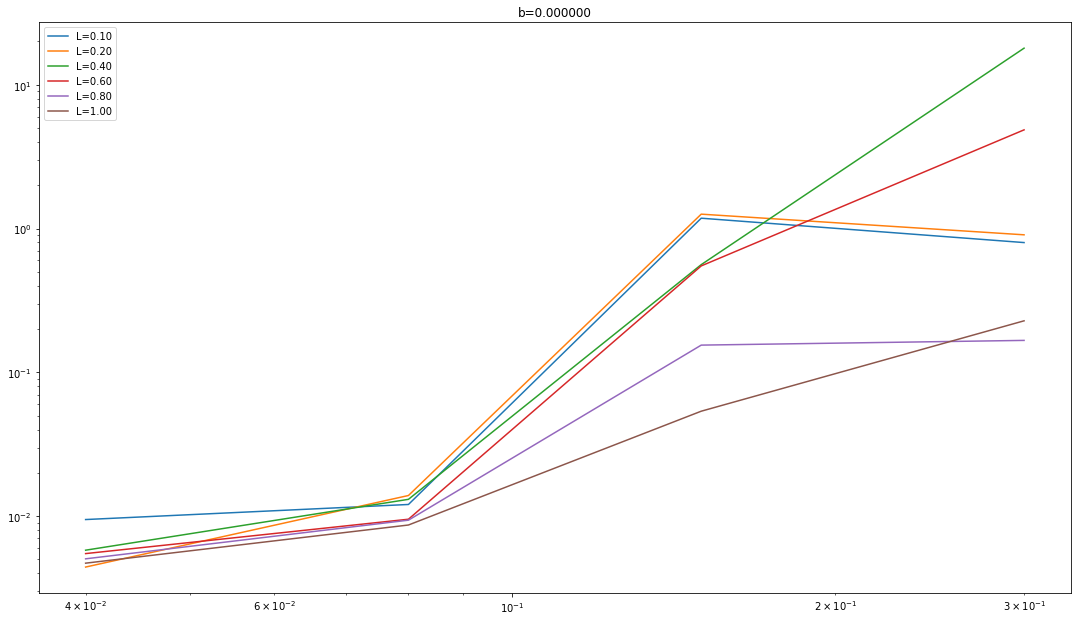

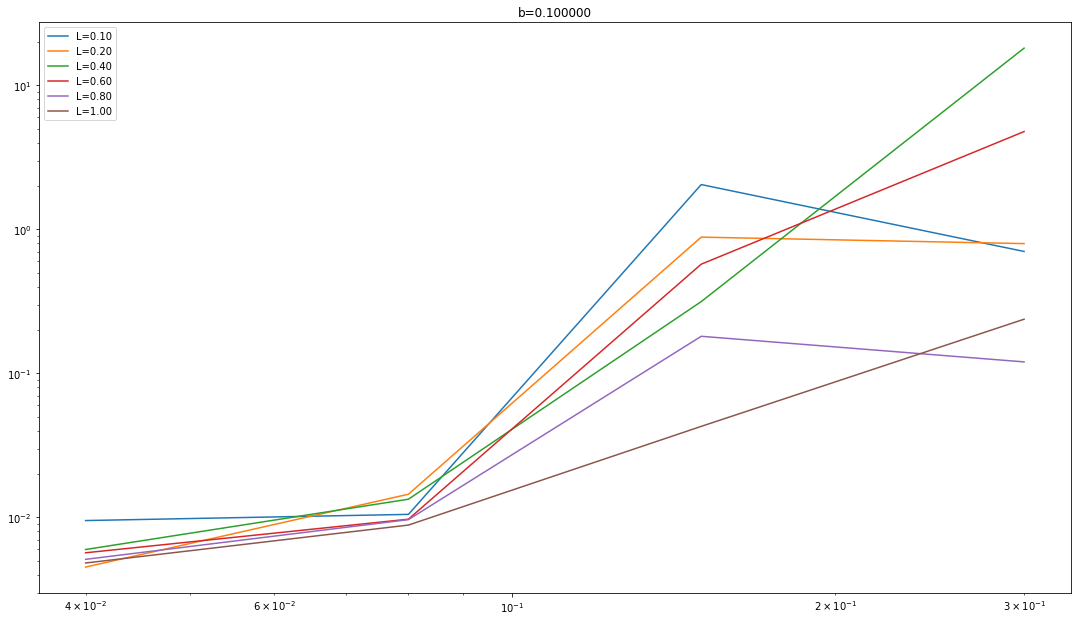

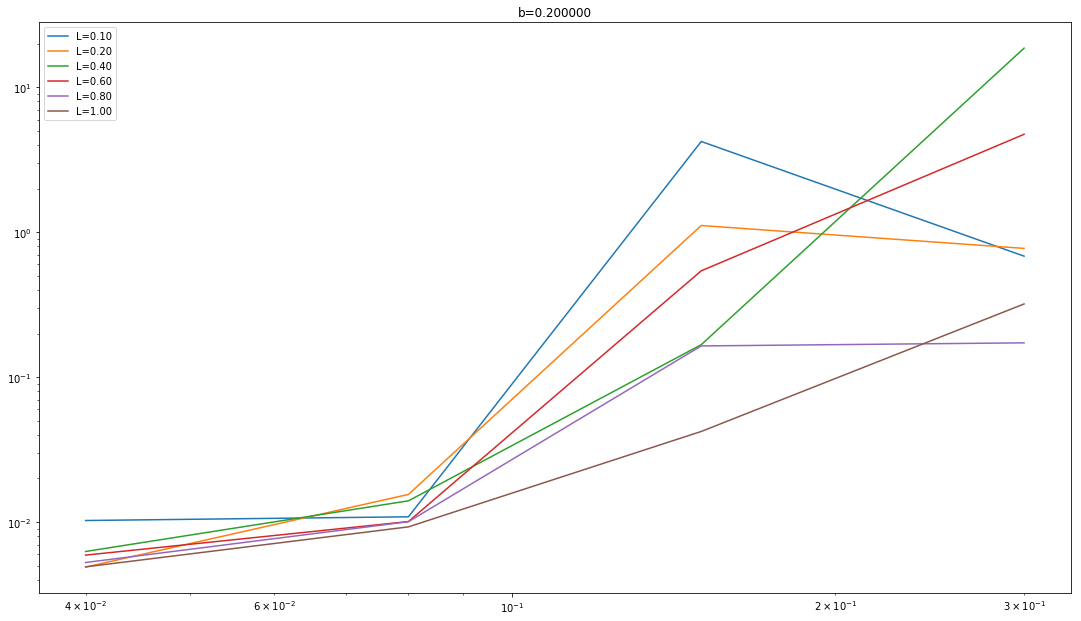

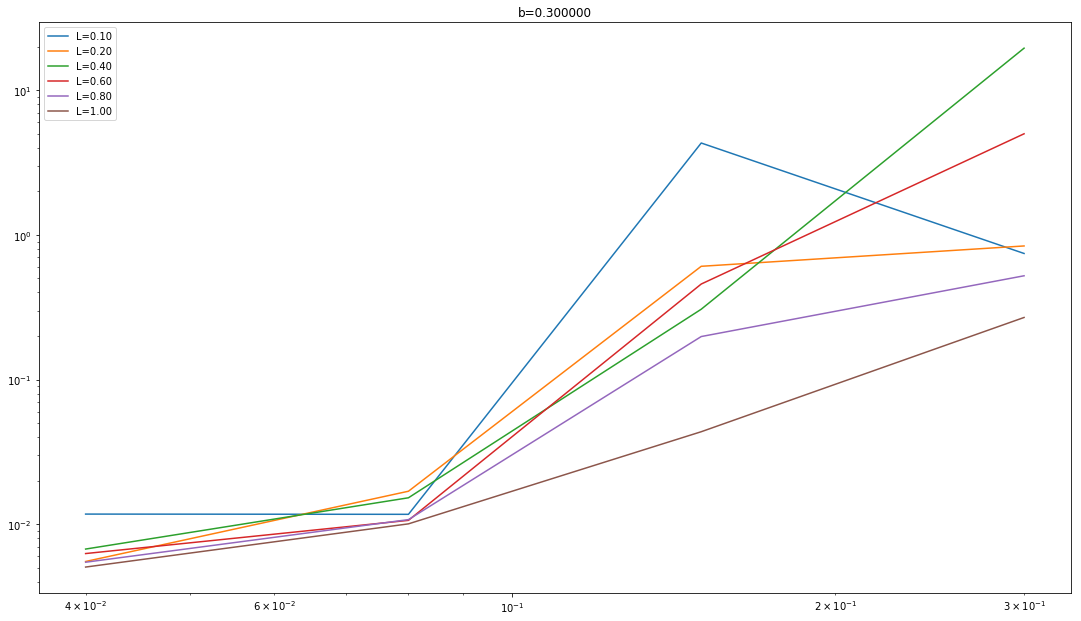

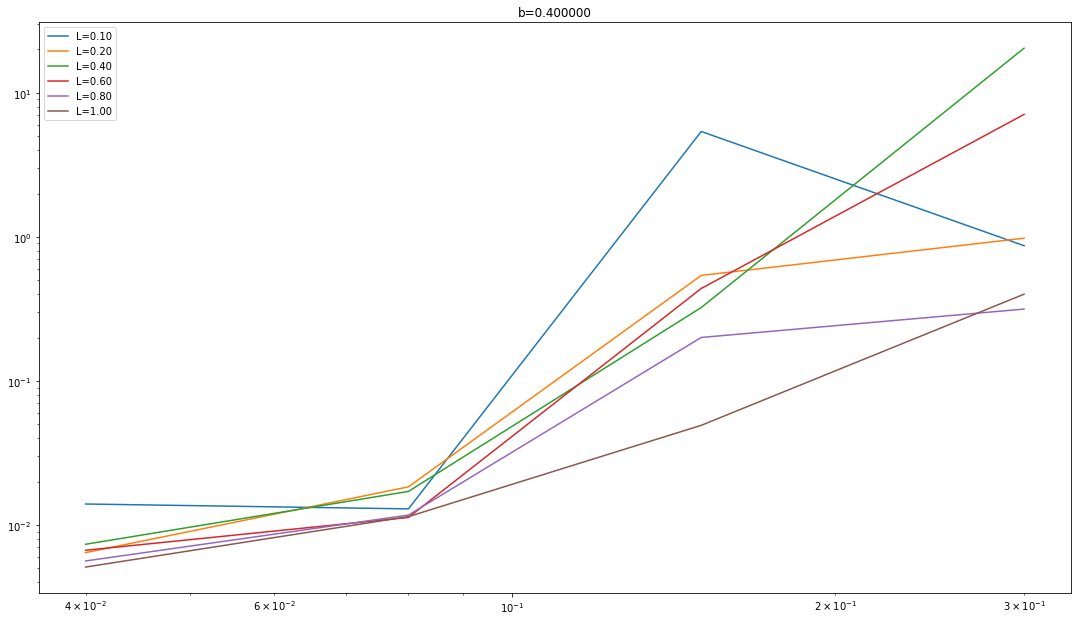

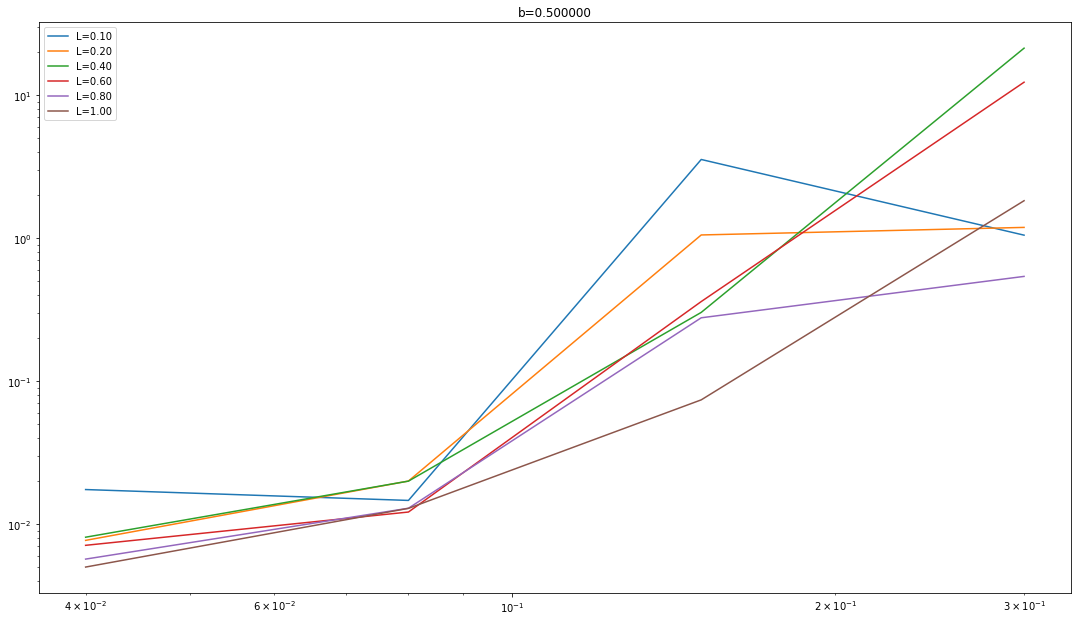

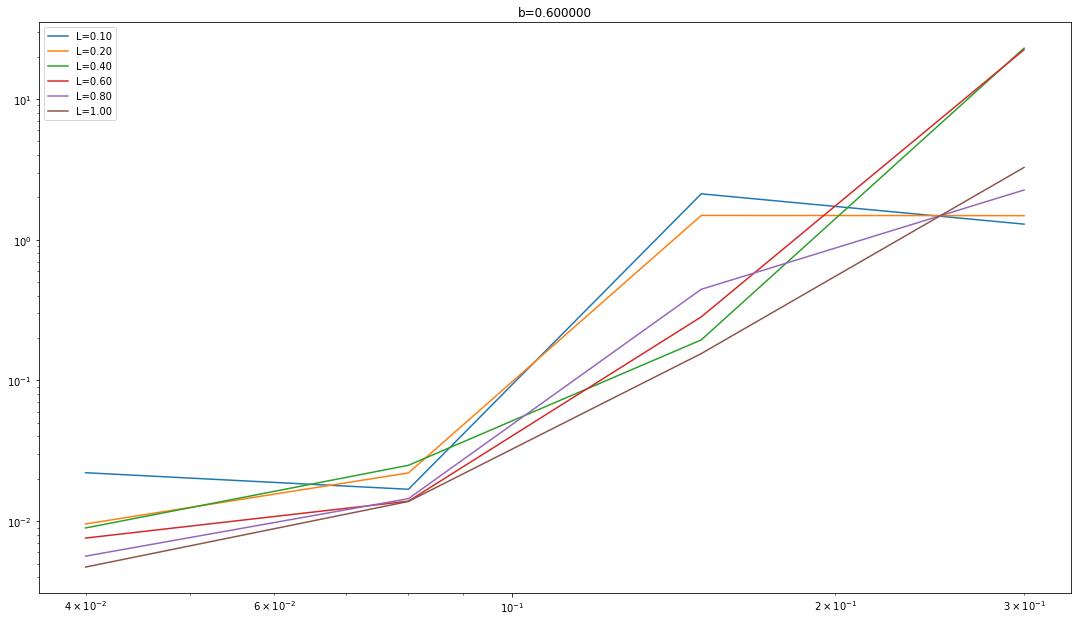

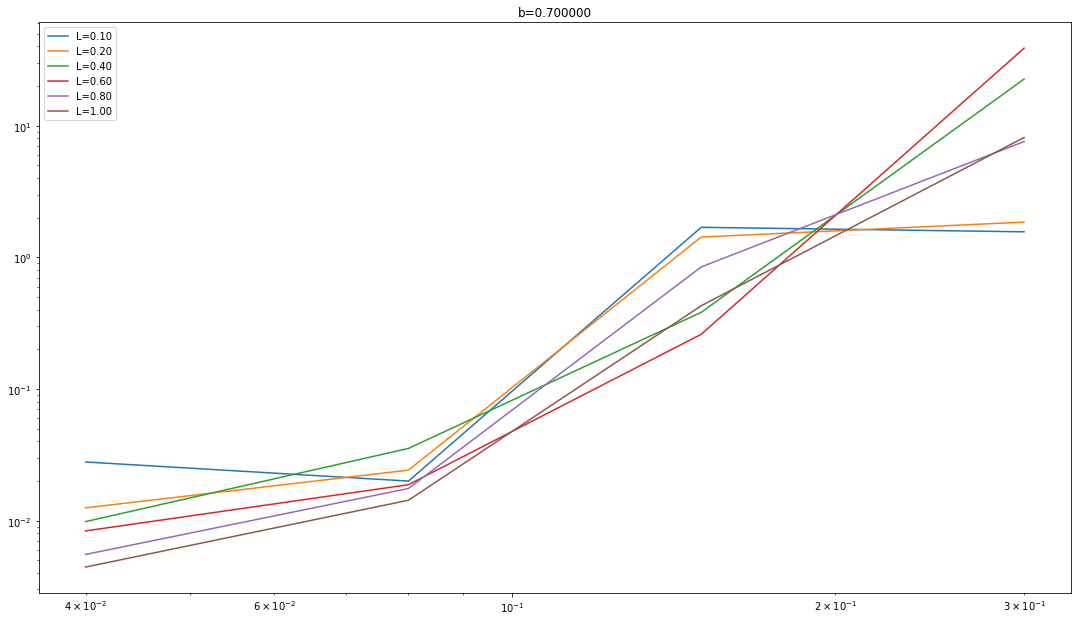

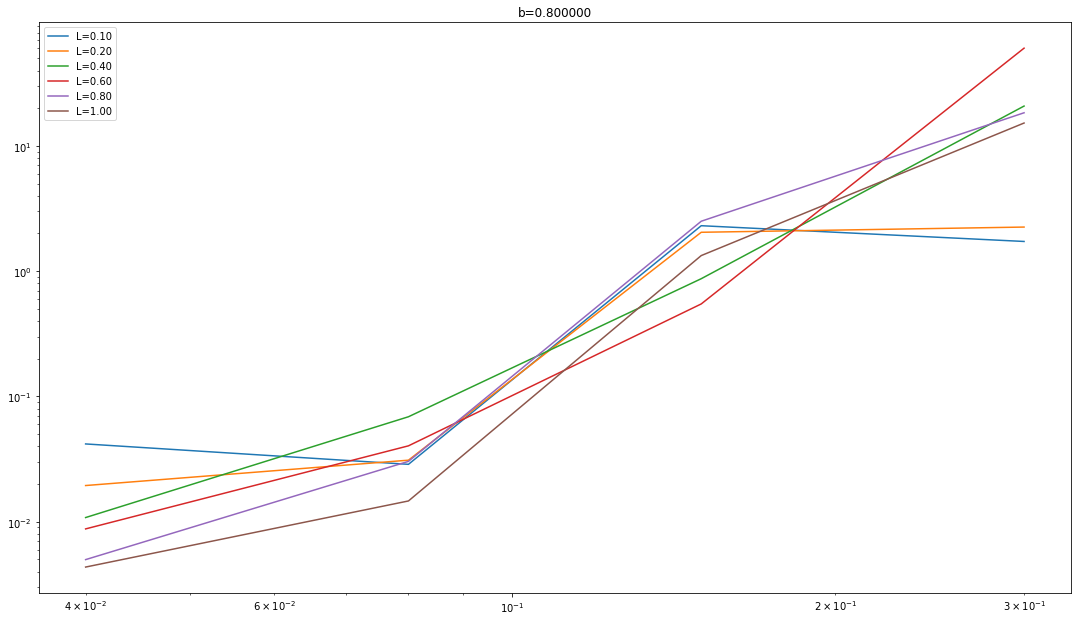

In [42]:
for bi in errx.columns:
    t1 = errx[bi]
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    for Li in t1.index.levels[0]:
        ty = t1.loc[Li]
        tx = ty.index
        ax1.loglog(tx, ty, label='L=%.2f' % Li)
    ax1.set_title('b=%f' % bi)
    ax1.legend()
